In [1]:
import pandas as pd
from collections import Counter

### Function to Get Dictionary Key

In [2]:
def getYearMonth(yr, m):
    if m < 10:
        return f"{yr}0{m}"
    else:
        return f"{yr}{m}"


### Load CSVs into a Dictionary of DataFrames
And print monthly ride counts while we're at it.

In [3]:
rawNY = {}
rawJC = {}

rides_by_month = []

for m in range(1, 13):
    month = m - 1
    rides = []
    for yr in range(2013, 2020):
        if (yr > 2013) or ((yr == 2013) and (m > 5)):
            yr_m = getYearMonth(yr, m)

            path = f"./data/{yr_m}-citibike-tripdata.csv"
            rawNY[yr_m] = pd.read_csv(path)
            rides.append(rawNY[yr_m].size)

            if (yr > 2015) or ((yr == 2015) and (m > 8)):
                path = f"./data/JC-{yr_m}-citibike-tripdata.csv"
                rawJC[yr_m] = pd.read_csv(path)
                rides[-1] = rides[-1] + rawJC[yr_m].size
        else:
            rides.append(0)
    rides_by_month.append(rides)
        
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
years = [2013, 2014, 2015, 2016, 2017, 2018, 2019]
tot_rides_hist_df = pd.DataFrame.from_records(rides_by_month, index=months, columns=years)
tot_rides_hist_df

,2013,2014,2015,2016,2017,2018,2019
Jan,0,4506000,4283280,7754355,11094030,10975065,14804445
Feb,0,3371040,2953950,8536860,12085095,12873270,14434635
Mar,0,6586755,5127390,14001480,11097990,14906715,20273490
Apr,0,10061700,9785850,15442365,20048850,19967655,26987250
May,0,12991755,14429790,18476520,23238510,27887490,29410470
Jun,8665545,14053200,14118285,22263975,26454810,29910600,32472000
Jul,12651240,14532630,16285140,21068190,26537580,29338395,33372150
Aug,15029370,14452335,17685660,23877180,27779550,30324135,35894025
Sep,15515385,14308305,19445505,25234215,28668255,28753590,37412160
Oct,15565680,12430665,18473115,24052245,28987665,28766925,32022390


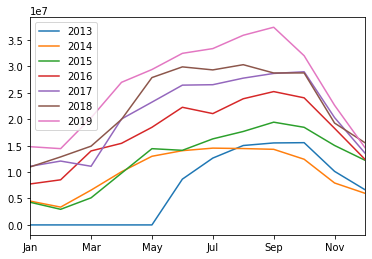

In [31]:
tot_hist_chart = tot_rides_hist_df.plot.line()
tot_hist_chart

### Evaluate DF Column Name Usage

In [6]:
def countColumns():
    column_counts = Counter()
    for month, df in rawNY.items():
        for column in df.columns:
            column_counts[column] += 1
    for month, df in rawJC.items():
        for column in df.columns:
            column_counts[column] += 1
    return column_counts.most_common()

countColumns()

[('tripduration', 106),
 ('starttime', 106),
 ('stoptime', 106),
 ('start station id', 106),
 ('start station name', 106),
 ('start station latitude', 106),
 ('start station longitude', 106),
 ('end station id', 106),
 ('end station name', 106),
 ('end station latitude', 106),
 ('end station longitude', 106),
 ('bikeid', 106),
 ('usertype', 106),
 ('birth year', 106),
 ('gender', 106),
 ('Trip Duration', 25),
 ('Start Time', 25),
 ('Stop Time', 25),
 ('Start Station ID', 25),
 ('Start Station Name', 25),
 ('Start Station Latitude', 25),
 ('Start Station Longitude', 25),
 ('End Station ID', 25),
 ('End Station Name', 25),
 ('End Station Latitude', 25),
 ('End Station Longitude', 25),
 ('Bike ID', 25),
 ('User Type', 25),
 ('Birth Year', 25),
 ('Gender', 25)]

### Find DFs with Unexpected Column Names

In [7]:
rawNY['201512'].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,475,12/1/2015 07:35:36,12/1/2015 07:43:32,72,W 52 St & 11 Ave,40.767272,-73.993929,173,Broadway & W 49 St,40.760647,-73.984427,22780,Subscriber,1983.0,1


In [24]:
rawNY['201610'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,328,2016-10-01 00:00:07,2016-10-01 00:05:35,471,Grand St & Havemeyer St,40.712868,-73.956981,3077,Stagg St & Union Ave,40.708771,-73.950953,25254,Subscriber,1992.0,1


In [26]:
rawNY['201703'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2


In [10]:
rawNY['201704'].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,195,2017-04-01 00:00:58,2017-04-01 00:04:14,217,Old Fulton St,40.702772,-73.993836,430,York St & Jay St,40.701485,-73.986569,25454,Subscriber,1966.0,1


In [16]:
rawJC['201509'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,61,2015-09-21 14:53:16,2015-09-21 14:54:17,3185,City Hall,40.717733,-74.043845,3185,City Hall,40.717733,-74.043845,24722,Subscriber,1975.0,1


In [27]:
rawJC['201703'].head(1)

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender
0,1076,2017-03-01 00:03:02,2017-03-01 00:20:58,3275,Columbus Drive,40.718355,-74.038914,3207,Oakland Ave,40.737604,-74.052478,26283,Subscriber,1991.0,1


In [12]:
rawJC['201704'].head(1)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,252,2017-04-01 00:14:36,2017-04-01 00:18:48,3186,Grove St PATH,40.719586,-74.043117,3203,Hamilton Park,40.727596,-74.044247,26238,Subscriber,NaN,0


### Normalize Column Names

In [30]:
renames = {
    "Trip Duration": "duration",
    "Start Time": "start",
    "Stop Time": "end",
    "Start Station ID": "start_id",
    "Start Station Name": "start_name",
    "Start Station Latitude": "start_lat",
    "Start Station Longitude": "start_lng",
    "End Station ID": "end_id",
    "End Station Name": "end_name",
    "End Station Latitude": "end_lat",
    "End Station Longitude": "end_lng",
    "Bike ID": "bike_id",
    "User Type": "type",
    "Birth Year": "birth_year",
    "Gender": "gender",
    "tripduration": "duration",
    "starttime": "start",
    "stoptime": "end",
    "start station id": "start_id",
    "start station name": "start_name",
    "start station latitude": "start_lat",
    "start station longitude": "start_lng",
    "end station id": "end_id",
    "end station name": "end_name",
    "end station latitude": "end_lat",
    "end station longitude": "end_lng",
    "bikeid": "bike_id",
    "usertype": "type",
    "birth year": "birth_year",
    "gender": "gender",
}

for _, df in rawNY.items():
    df.rename(columns=renames, inplace=True)
for _, df in rawJC.items():
    df.rename(columns=renames, inplace=True)

countColumns()

[('duration', 131),
 ('start', 131),
 ('end', 131),
 ('start_id', 131),
 ('start_name', 131),
 ('start_lat', 131),
 ('start_lng', 131),
 ('end_id', 131),
 ('end_name', 131),
 ('end_lat', 131),
 ('end_lng', 131),
 ('bike_id', 131),
 ('type', 131),
 ('birth_year', 131),
 ('gender', 131)]

In [34]:
stations = {}
for month, df in rawNY.items():
    for row in df.itertuples(index=False):
        if row.start_id not in stations:
            stations[row.start_id] = {'id': row.start_id, 'name': row.start_name, 'new': month,
                                      'lat': row.start_lat, 'lng': row.start_lng}
        elif row.end_id not in stations:
            stations[row.start_id] = {'id': row.end_id, 'name': row.end_name, 'new': month,
                                      'lat': row.end_lat, 'lng': row.end_lng}
for month, df in rawJC.items():
    for row in df.itertuples(index=False):
        if row.start_id not in stations:
            stations[row.start_id] = {'id': row.start_id, 'name': row.start_name, 'new': month,
                                      'lat': row.start_lat, 'lng': row.start_lng}
        elif row.end_id not in stations:
            stations[row.start_id] = {'id': row.end_id, 'name': row.end_name, 'new': month,
                                      'lat': row.end_lat, 'lng': row.end_lng}
stations

{2009: {'id': nan, 'name': nan, 'new': '201306', 'lat': nan, 'lng': nan},
 536: {'id': 3695,
  'name': 'E 5 St & 2 Ave',
  'new': '201807',
  'lat': 40.72686951528207,
  'lng': -73.9891903102398},
 228: {'id': 3678,
  'name': 'Fairmount Ave',
  'new': '201807',
  'lat': 40.72572613742557,
  'lng': -74.07195925712584},
 519: {'id': 3188,
  'name': 'NJCU',
  'new': '201709',
  'lat': 40.710108700000006,
  'lng': -74.0858489},
 83: {'id': nan, 'name': nan, 'new': '201306', 'lat': nan, 'lng': nan},
 422: {'id': 3247,
  'name': 'SSP - Basement',
  'new': '201607',
  'lat': 0.0,
  'lng': 0.0},
 516: {'id': 3695,
  'name': 'E 5 St & 2 Ave',
  'new': '201807',
  'lat': 40.72686951528207,
  'lng': -73.9891903102398},
 380: {'id': 3214,
  'name': 'Essex Light Rail',
  'new': '201611',
  'lat': 40.712774200000005,
  'lng': -74.03648570000001},
 296: {'id': 3480,
  'name': "Washington Street (Don't Use)",
  'new': '201709',
  'lat': 0.0,
  'lng': 0.0},
 540: {'id': 3812,
  'name': 'University Pl &